# Data Analysis Project Part 2

## Noah Choate and Elijah Ritchie

## Introduction

Since the beginning of our academic careers students have always been told that studying ensures a good grade on the upcoming exam. With this analysis, we aim to verify the integrity of teachers and instructors across the United States and their persistent studying talks. We will do so by utilzing k-clusters and examine what cluster performs the best on exams - the ones who study or the ones who do not.

## Data Information

For the purpose of this assignment, the dataset that will be analyzed is a very simple student exam data found on kaggle. The dataset has 500 entries and 3 columns; Study Hours, Previous Exam Score, and Pass/Fail.

## Loading the Libraries / Data

To begin we loaded pandas to help manipulate the dataframe to perform an accurate data analysis. We also noted the Mean and Standard Deviation of the variables we are planning to use; Study Hours and Previous Exam scores. This will be useful during our analysis when we begin interpreting our cluster plot. It is important to note these values before normalizing the values as they will be more difficult to interpret.  Next, while utilzing sklearn, we loaded KMeans to initiate the K-Means clustering algorithm which uses a user-set k-value to cluster / organize the data from the dataset around k numbers of centroids. We additionally loaded Standard Scaler to scale our the variables used during the analysis, which improves accuracy behind the k-means algorithm. The last package we loaded was matplotlib, which enables visualizations of our analysis. Finally, we loaded the dataset into the kernel. The first computations we did were finding the means and standard deviations of the variables we are going to use, they will be useful for interpretations later.

In [1]:
# Load necessary packages
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("data/student_exam_data_new.csv")

In [2]:
# Evaluate Mean and SD of Previous Exam Scores and Study Hours
studyhrs_mean = df['Study Hours'].mean()
studyhrs_std = df['Study Hours'].std()

print("Mean Study Hours:", studyhrs_mean)
print("Standard Deviation Study Hours:", studyhrs_std)

exam_mean = df['Previous Exam Score'].mean()
exam_std = df['Previous Exam Score'].std()

print("Previous Exam Score Mean:", exam_mean)
print("Previous Exam Score Standard Deviation:", exam_std)

Mean Study Hours: 5.487055410106127
Standard Deviation Study Hours: 2.688195675704332
Previous Exam Score Mean: 68.91708366437523
Previous Exam Score Standard Deviation: 17.12960741315282


## Cleaning the data

Luckily, the dataset provided from kaggle was a very simple three column dataframe. While there was no real additonal cleaning needed, we made sure by dropping any possible NA values, followed by dropping the binary Pass/Fail column as it will not be needed for this analysis.

In [3]:
# Initial look at the data set, ensure no additional cleaning is needed
df.head()
df.nunique()

df.dropna(inplace=True)
df.drop(columns=["Pass/Fail"])

,Study Hours,Previous Exam Score
0,4.370861,81.889703
1,9.556429,72.165782
2,7.587945,58.571657
3,6.387926,88.827701
4,2.404168,81.083870
...,...,...
495,4.180170,45.494924
496,6.252905,95.038815
497,1.699612,48.209118
498,9.769553,97.014241


## The K-Clustering Algorithm

To begin the analysis, we will start by normalizing the two variables used for this analysis; Study Hours and Previous Exam Score. It is important to normalize the variables as it puts the variables on the same scale and in return improves the K-clustering algorithm. Next, to find the correct K-Value, we will use the "Elbow Method," to help find the correct K-value for our analysis. It is called the "Elbow Method" as the graph produced by utilizing this method looks similar to a human elbow, and the point at where the elbow seems bent is the appropriate k-value. This visualizes the mean's distance from the centroid's rate of change. Finally we will produce our K-clustering visualization and interpret it with the desired k-value found from our elbow graph.

In [4]:
# Preprocessing: Normalize the variables
scaler = StandardScaler()
df[['Study Hours', 'Previous Exam Score']] = scaler.fit_transform(df[['Study Hours', 'Previous Exam Score']])

# Feature selection
X = df[['Study Hours', 'Previous Exam Score']]

### The Elbow Graph

C:\Users\noahc\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


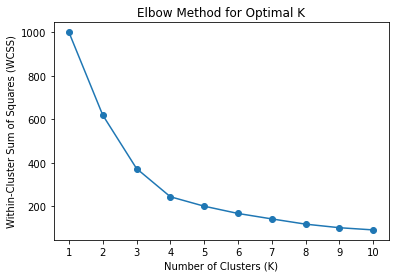

In [5]:
# Evaluate K from 1 to 10 clusters
k_values = range(1, 11)

# Apply K-Means for each K-value and compute WCSS
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ contains WCSS value

# Plot the Elbow Curve
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.show()

With the produced elbow graph, it seems the rate of change starts to stop changing is at 4. Therefore, for our analysis we will use the k-value of 4. 

### Cluster Plot

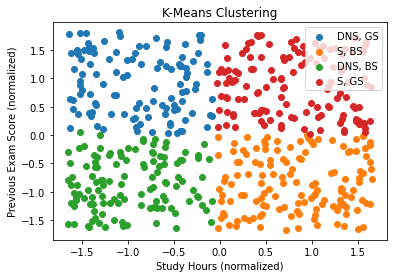

In [6]:
# Acknowledging the elbow-graph, make k-value equal to 4
k = 4

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Define label names
label_names = ['DNS, GS', 'S, BS', 'DNS, BS', 'S, GS']

# Visualize the clusters
for cluster_label, label_name in zip(range(k), label_names):
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Study Hours'], cluster_data['Previous Exam Score'], label=label_name)

    
# Signal each cluster (Was used to ensure that we interpreted each cluster with the correct context)
#for i, row in df.iterrows():
    #plt.annotate(row['Cluster'], (row['Study Hours'], row['Previous Exam Score']), xytext=(0,10), ha='center')
    
plt.xlabel('Study Hours (normalized)')
plt.ylabel('Previous Exam Score (normalized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

##### Key:
| Abbreviation | Label |
|---------|-------|
| S | Studied |
| DNS | Did Not Study |
| GS | Good Score |
| BS | Bad Score |

| Label | Plot Ruling |
|---------|-------|
| Studied | 0 ≤ x ≤ 5.5 + (SD(2.7)) |
| Did Not Study | 5.5 - (SD(2.7)) ≤ x ≤ 0 |
| Good Score | 0 ≤ x ≤ 68.9 + (SD(17.1)) |
| Bad Score | 68.9 - (SD(17.1)) ≤ x ≤ 0 |

##### Revisiting our Means and SDs before Normalizing
* Mean Study Hours: 5.487055410106127
* Standard Deviation Study Hours: 2.688195675704332
* Previous Exam Score Mean: 68.91708366437523
* Previous Exam Score Standard Deviation: 17.12960741315282

A Good Score / Studied is defined by a datapoint being within a positive SD away from the mean, a Bad Score / Did Not Study is defined by being a negative SD away from the mean. It is important to notice that a "Good" attribute is good relative to the class. For the purpose of this plot, we visualized all datapoints within +/- 1.5 SD away from the mean. With this rule established, we can utilize the mean and standard deviation we found before normalizing our variables. Briefly, those that scored good achieved higher than the mean of 68, and those that scored bad recieved lower than a 68. Those that "studied" logged more than ~5.5 hours, those that "Did Not Study" logged less than that. 

 * Note that the Mean Values are rounded to the nearest tenth on the table for convenience.


| Label | Number in Cluster | Percentage of Total Dataset |
|-----------------|-----------------|-----------------|
| Did Not Study, Good Score (Blue)    | 112    | 22.4%    |
| Studied, Bad Score (Yellow)    | 135    | 27%    |
| Did Not Study, Bad Score (Green)   | 121    | 24.2%    |
| Studied, Good Score (Red)   | 132    | 26.4%    |



Our K-means visualization produced introduces four clusters which we defined into four different categories. Instructors, look away! With this dataset, it seems that there is no heavy advantage to those that studied. All clusters are within ~ +/- 2.5% of being perfectly split 25% 4 ways of the dataframe, meaning a difference of at max 13 students between all four catergories. With our analysis, we identify that our best performing group (cardinality-wise) were the students who studied, yet still achieved a bad score (Less than at least 68), with 135 students. Right behind that group is the students who studied and scored well on the exam (Above a 68), with 132. The third best group, those that did not study and recieved a bad score had 121 students, with our worst performing group having 121 students, those that did not study yet managed to achieve a good score.

With this data, it is hard for us to say there is a defining answer that studying ensures you achieve a good score. Even if we ignored the cardinality of each cluster, the fact that 27% of students studied 5.5 hours and yet still scored less than a 68.9 is hard to ignore when claiming that studying ensures a good grade. Even if we focused on those who did achieve a "good grade," plots right on the axis lines (0.0, 0.0) means they scored just above a 68, maybe a 70, 71. Personally, I wouldn't consider a C a "good grade," and would be disappointed upon recieving said grade. It is also important to note that the exam scores given were previous exam scores. This means that students may have changed their study habits from test 1 to test 2, prompting a datapoint that does not exactly represent what we are wanting to analyze. 

In [7]:
# Work for Table 3

# Count the occurrences of each cluster label
cluster_counts = df['Cluster'].value_counts()

# Calculate the total number of data points
total_datapoints = len(df)

# Calculate the percentage of data points in each cluster
cluster_percentages = (cluster_counts / total_datapoints) * 100

# Print the results
for cluster_label, count, percentage in zip(cluster_counts.index, cluster_counts.values, cluster_percentages.values):
    print(f"Cluster {cluster_label}: {count} data points ({percentage:.2f}%)")

Cluster 1: 135 data points (27.00%)
Cluster 3: 132 data points (26.40%)
Cluster 2: 121 data points (24.20%)
Cluster 0: 112 data points (22.40%)


## Conclusion

Data analysis can prove many questions from where should we deploy our local police officers to is studying a legitimate way to score good on the upcoming exam. Utilizing k-clustering, we identified 4 clusters of students and seperated them into simple terms (Studied, Good Score etc.) We then found that the largest cluster where actually the students who had studied extensively (5+ hours) and ended up still doing bad on exams, with the lowest being those who did not study and miraculously still did good on the exam. While this sounds like hard-evidence, it is still difficult to solidify that studying ensures a good grade. All of our clusters were just about within +/- 2.5% of being evenly split 25/25/25/25 among four clusters, meaning that there is no real prominent answer. Another thing to note is what is a good exam score? While using Mean and SD, we identified 68+ being a good exam score, I personally would not enjoy recieving a 68 on an exam. Additionally we were given previous exam scores, how many students changed their study habits from the 1st to 2nd exam? Regardless, with our analysis it is hard to give a definitive answer of whether or not studying ensures a good test score. If we had to give you an answer, we would say you might as well start studying.